In [2]:
from Uncertainty import *
from uncertaintyMetric import *
from utils import *

K.clear_session()
check_tensorflow_gpu()

Checking Tensorflow Version:
Tensorflow built with CUDA? True
Tensorflow version: 2.6.2
# GPU available: 1
CUDA: 64_112 | cuDNN: 64_8
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


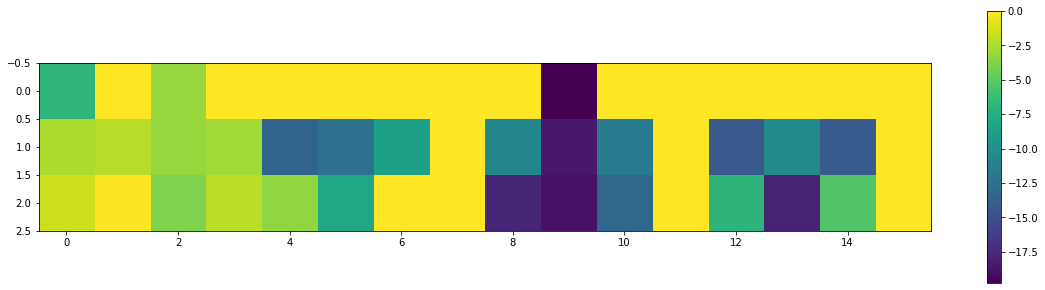

In [12]:
plt.figure(figsize=(20,5))
plt.imshow(np.load('_misael_results/result_temp_MARS.npy').reshape(3,16))
plt.colorbar()

In [3]:
### LAYER OPTIMIZATION
# layer1, layer2, layer3 = np.arange(2,18), np.arange(18,34), np.arange(34,50)
# layer_list = [layer1, layer2, layer3]
# result = pd.DataFrame(index=['layer 1', 'layer 2', 'layer 3'], columns=['measure 1', 'measure 2', 'measure 3', 'measure 4'])
# for m in range(4):
#     for l in range(len(layer_list)):
#         result.iloc[l,m] = Proxy(ncol_data=list(layer_list[l]), measure_type=m+1, nDataRealization=50, nMCSamples=300, 
#                                  rom_data=LinearRegression(), rom_obj=LinearRegression(), error_option=2).value 
# result.to_csv('optimization_by_layer.csv')

### COLUMN/WELL OPTIMIZATION
well_names = ['well {}'.format(p+1) for p in range(16)]
templist, well = np.arange(2,50,step=16), {}
for i in range(16):
    well[i] = templist+i
wells = np.array(list(well.values()))
results = pd.DataFrame(index=well_names, columns=['measure 1', 'measure 2', 'measure 3', 'measure 4'])
for m in range(4):
    for i in range(16):
        print(wells[i])
#         results.iloc[i,m] = Proxy(ncol_data=list(wells[i]), measure_type=m+1, nDataRealization=50, nMCSamples=400, rom_data=LinearRegression(), rom_obj=LinearRegression()).value
# results.to_csv('optimizabion_by_column.csv')

[ 2 18 34]
[ 3 19 35]
[ 4 20 36]
[ 5 21 37]
[ 6 22 38]
[ 7 23 39]
[ 8 24 40]
[ 9 25 41]
[10 26 42]
[11 27 43]
[12 28 44]
[13 29 45]
[14 30 46]
[15 31 47]
[16 32 48]
[17 33 49]
[ 2 18 34]
[ 3 19 35]
[ 4 20 36]
[ 5 21 37]
[ 6 22 38]
[ 7 23 39]
[ 8 24 40]
[ 9 25 41]
[10 26 42]
[11 27 43]
[12 28 44]
[13 29 45]
[14 30 46]
[15 31 47]
[16 32 48]
[17 33 49]
[ 2 18 34]
[ 3 19 35]
[ 4 20 36]
[ 5 21 37]
[ 6 22 38]
[ 7 23 39]
[ 8 24 40]
[ 9 25 41]
[10 26 42]
[11 27 43]
[12 28 44]
[13 29 45]
[14 30 46]
[15 31 47]
[16 32 48]
[17 33 49]
[ 2 18 34]
[ 3 19 35]
[ 4 20 36]
[ 5 21 37]
[ 6 22 38]
[ 7 23 39]
[ 8 24 40]
[ 9 25 41]
[10 26 42]
[11 27 43]
[12 28 44]
[13 29 45]
[14 30 46]
[15 31 47]
[16 32 48]
[17 33 49]


In [ ]:
# select       = 7
# plot_bounds  = [-3, 3]

# local_method = 'trust-krylov'
# x0           = [1.5, 1.5]
# glob_bounds  = [-2, 2]

# opt = FullOpt(select)
# local_res,  local_res_df  = opt.local_opt(x0=x0, method=local_method)
# global_res, global_res_df = opt.global_opt(varbounds=glob_bounds)
# opt.make_plot(global_res_df, local_res_df, mbounds=plot_bounds, 
#               showcontours=True, showtrajectory=True, angle=[45,225])

Brute Force

In [ ]:
view_results('LR', suptitle='Linear Regression ROM', folder='_misael_results')
view_results('MARS', suptitle='MARS ROM', folder='_misael_results')

***

In [ ]:
# General settings
Main_Directory   = os.getcwd()
Data_Directory   = os.path.join(Main_Directory, 'data')
titles           = ['.', 'Pressure', 'CO2 Saturation (l)', 'Temperature', 'Pressure + CO2 Saturation']
unc_params       = ['perm4', 'perm5', 'perm6', 'kmult']

MeasureType      = 1                           # Measurement type: 1 for pressure; 2 for CO2 saturation; 3 for tempeture, 4 for pressure+CO2 saturation                     
Total_time       = 1800                        # Total injection and post-injection time (days)
nTimeSeries      = 60                          # The number of measurement time series
nInterval        = 1                           # Measurement interval, default value = 1/Month

nTrain           = 500                         # The number of training simulations
Obj_filename     = 'run_co2mt.his'             # Objective file name
nColumn_obj      = 50                          # The column(s) in which the object of interest is located
nColumn_data     = [7]    #[7]                 # The column in which the data measurement is located 

x_max            = [1e-14, 1e-14, 1e-14, 2.0]  # Upper bounds for all the uncertain parameters
x_min            = [1e-19, 1e-19, 1e-19, 0.5]  # Lower bounds for all the uncertain parameters
ROMs_validation  = 0                           # ROMs cross-validation flag
nMCSamples       = 10000  #100000              # Number of monte carlo samples
nParam           = 4                           # Number of uncertain parameters
nDataRealization = 100    #200                 # Number of data realizations
err_option       = 3                           # Type of err option (2=MeanAE, 3=MaxAE)
time_sensitivity = 1                           # Whether consider time sensitivity for UR flag
post_processing  = 1                           # Plotting flag
print('Current Working Directory: {}'.format(Main_Directory))
print('Data Directory: {}'.format(Data_Directory))

## Step 1: Perfrom training simulation
# This step is done in a seperate code.

roms = [Ridge(), Ridge()]

***
# END